<a href="https://colab.research.google.com/github/Brahmanaman/Machine_Learning_Project_For_Beginners/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data collection and preprocessing

In [30]:
# importing the dataset

load_dataset = pd.read_csv("/content/Loan.csv")

In [31]:
load_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
load_dataset.shape

(614, 13)

In [33]:
load_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [34]:
load_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
load_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handing Null Values in Gender Column and converting it into numeric columns

In [36]:
load_dataset["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [41]:
load_dataset["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [42]:
load_dataset["Gender"] = load_dataset["Gender"].map({"Male": 0, "Female": 1})

In [47]:
load_dataset["Gender"] = load_dataset["Gender"].fillna(load_dataset["Gender"].mean())

In [48]:
load_dataset["Gender"].isnull().sum()

0

### Handing Null Values in Merriage Column and converting it into numeric columns

In [49]:
load_dataset["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [51]:
load_dataset["Married"].isnull().sum()

3

In [52]:
load_dataset["Married"] = load_dataset["Married"].map({"No": 0, "Yes": 1})

In [53]:
load_dataset["Married"] = load_dataset["Married"].fillna(load_dataset["Married"].mean())

In [54]:
load_dataset["Married"].isnull().sum()

0

### Handing Null Values in Education Column and converting it into numeric columns

In [55]:
load_dataset["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [56]:
load_dataset["Education"] = load_dataset["Education"].map({"Not Graduate": 0, "Graduate": 1})

In [58]:
load_dataset["Education"].isnull().sum()

0

### Handing Null Values in Self_Employed Column and converting it into numeric columns

In [59]:
load_dataset["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [61]:
load_dataset["Self_Employed"].isnull().sum()

32

In [62]:
load_dataset["Self_Employed"] = load_dataset["Self_Employed"].map({"No": 0, "Yes": 1})

In [63]:
load_dataset["Self_Employed"] = load_dataset["Self_Employed"].fillna(load_dataset["Self_Employed"].mean())

In [64]:
load_dataset["Self_Employed"].isnull().sum()

0

### Handing Null Values in Loan_Amount Column and converting it into numeric columns

In [65]:
load_dataset["LoanAmount"].isnull().sum()

22

In [66]:
load_dataset["LoanAmount"] = load_dataset["LoanAmount"].fillna(load_dataset["LoanAmount"].mean())

In [67]:
load_dataset["LoanAmount"].isnull().sum()

0

In [68]:
load_dataset["Loan_Amount_Term"].isnull().sum()

14

In [70]:
load_dataset["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [71]:
load_dataset["Loan_Amount_Term"] = load_dataset["Loan_Amount_Term"].fillna(load_dataset["Loan_Amount_Term"].mean())

In [72]:
load_dataset["Loan_Amount_Term"].isnull().sum()

0

In [74]:
final_dataset = load_dataset.dropna()

In [75]:
final_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
final_dataset.drop(["Loan_ID"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
final_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,0.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,0.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,0.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,0.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [78]:
final_dataset["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [79]:
final_dataset["Property_Area"] = final_dataset["Property_Area"].map({"Urban" : 2, "Rural" : 0, "Semiurban" : 1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
final_dataset["Property_Area"].unique()

array([2, 0, 1])

In [81]:
final_dataset["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [82]:
final_dataset["Loan_Status"] = final_dataset["Loan_Status"].map({"Y": 1, "N": 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
final_dataset["Loan_Status"].unique()

array([1, 0])

In [84]:
final_dataset["Loan_Status"].value_counts()

1    376
0    173
Name: Loan_Status, dtype: int64

In [85]:
final_dataset.shape

(549, 12)

In [88]:
final_dataset["Dependents"].value_counts()

0     316
2      95
1      90
3+     48
Name: Dependents, dtype: int64

In [89]:
final_dataset["Dependents"] = final_dataset["Dependents"].replace(to_replace = "3+", value = 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
final_dataset["Dependents"].value_counts()

0    316
2     95
1     90
4     48
Name: Dependents, dtype: int64

In [92]:
final_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


## Data Visualization

In [94]:
import seaborn as sns

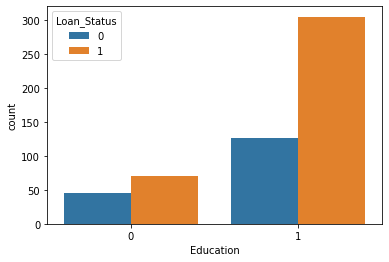

In [96]:
sns.countplot(x = "Education", hue = "Loan_Status", data = final_dataset)

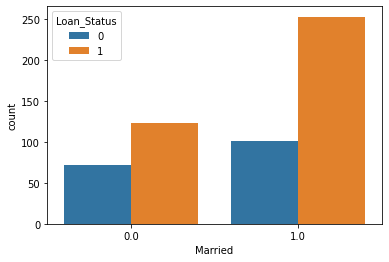

In [97]:
sns.countplot(x = "Married", hue = "Loan_Status", data = final_dataset)

In [106]:
# separating the data and label
X = final_dataset.drop(columns=['Loan_Status'],axis=1)
Y = final_dataset['Loan_Status']

In [107]:
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
0       0.0      0.0  ...            1.0              2
1       0.0      1.0  ...            1.0              0
2       0.0      1.0  ...            1.0              2
3       0.0      1.0  ...            1.0              2
4       0.0      0.0  ...            1.0              2
..      ...      ...  ...            ...            ...
609     1.0      0.0  ...            1.0              0
610     0.0      1.0  ...            1.0              0
611     0.0      1.0  ...            1.0              2
612     0.0      1.0  ...            1.0              2
613     1.0      0.0  ...            0.0              1

[549 rows x 11 columns]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 549, dtype: int64


# Train Test Split

In [108]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [109]:
print(X.shape, X_train.shape, X_test.shape)

(549, 11) (494, 11) (55, 11)


In [115]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Training the model:

Support Vector Machine Model

In [116]:
classifier = svm.SVC(kernel='linear')

In [117]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [118]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [119]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [120]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8181818181818182
